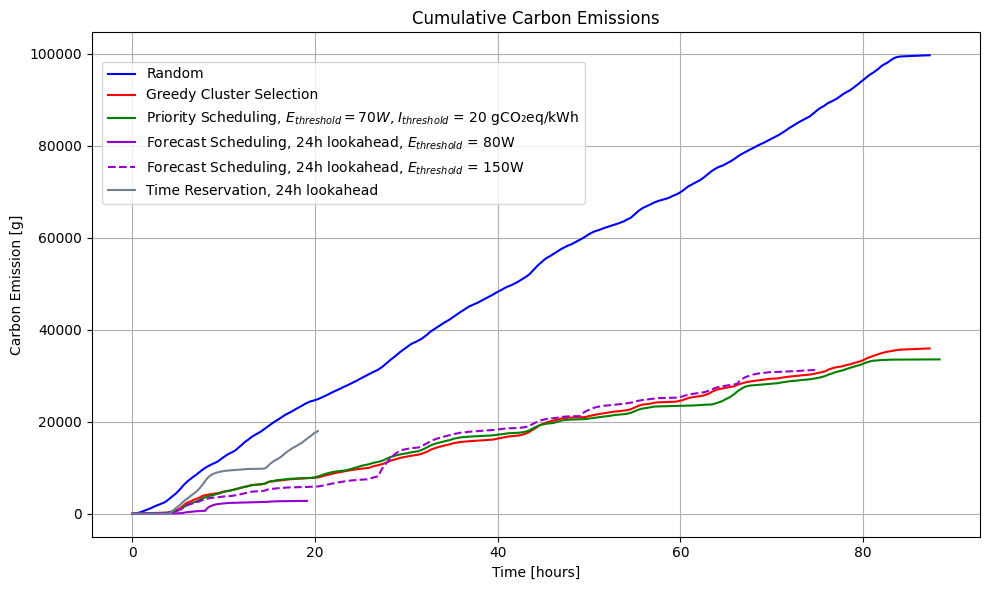

In [668]:
import pandas as pd
import matplotlib.pyplot as plt

#dir = "../results/100_single"
#dir = "../results/100_small"
dir = "../results/30"

# Load the data
random_df_emission = pd.read_csv(dir + '/random/scheduler.csv')
random_df_emission['hours'] = random_df_emission['tick'] / 3600
random_df_emission['cumulative_emission'] = random_df_emission['cumulative_emission']

greedy_df_emission = pd.read_csv(dir + '/greedy/scheduler.csv')
greedy_df_emission['hours'] = greedy_df_emission['tick'] / 3600
greedy_df_emission['cumulative_emission'] = greedy_df_emission['cumulative_emission']

greedy_binpack_df_emission = pd.read_csv(dir + '/greedy_binpack/scheduler.csv')
greedy_binpack_df_emission['hours'] = greedy_binpack_df_emission['tick'] / 3600
greedy_binpack_df_emission['cumulative_emission'] = greedy_binpack_df_emission['cumulative_emission']

delay_150_df_emission = pd.read_csv(dir + '/delay_150/scheduler.csv')
delay_150_df_emission['hours'] = delay_150_df_emission['tick'] / 3600
delay_150_df_emission['cumulative_emission'] = delay_150_df_emission['cumulative_emission']

delay_80_df_emission = pd.read_csv(dir + '/delay_80/scheduler.csv')
delay_80_df_emission['hours'] = delay_80_df_emission['tick'] / 3600
delay_80_df_emission['cumulative_emission'] = delay_80_df_emission['cumulative_emission']

reservation_df_emission = pd.read_csv(dir + '/reservation/scheduler.csv')
reservation_df_emission['hours'] = reservation_df_emission['tick'] / 3600
reservation_df_emission['cumulative_emission'] = reservation_df_emission['cumulative_emission']

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot cumulative emissions on the primary y-axis
ax1.plot(random_df_emission['hours'], random_df_emission['cumulative_emission'], label='Random', color='blue')

ax1.plot(greedy_df_emission['hours'], greedy_df_emission['cumulative_emission'], label='Greedy Cluster Selection', color='red')
ax1.plot(greedy_binpack_df_emission['hours'], greedy_binpack_df_emission['cumulative_emission'], label=r'Priority Scheduling, $E_{threshold} = 70W$, $I_{threshold}$ = 20 gCO₂eq/kWh', color='green')
ax1.plot(delay_80_df_emission['hours'], delay_80_df_emission['cumulative_emission'], label='Forecast Scheduling, 24h lookahead, $E_{threshold}$ = 80W', color='darkviolet', linestyle='solid')
ax1.plot(delay_150_df_emission['hours'], delay_150_df_emission['cumulative_emission'], label='Forecast Scheduling, 24h lookahead, $E_{threshold}$ = 150W', color='darkviolet', linestyle='dashed')
ax1.plot(reservation_df_emission['hours'], reservation_df_emission['cumulative_emission'], label='Time Reservation, 24h lookahead', color='slategrey', linestyle='solid')

ax1.set_xlabel('Time [hours]')
ax1.set_ylabel('Carbon Emission [g]', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Add legends for both axes
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
ax1.grid(True)

#plt.xlim(230, 314)
#plt.ylim(100000, 200000)

#plt.xlim(0, 1)

# Add a title 
plt.title('Cumulative Carbon Emissions')

# Show the plot
plt.tight_layout()
#plt.yscale('log')
plt.show()

# 307 hours total run time greedy binpack, and 295 hours greedy
